In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_Name = "Northern Branch Phase II Debris Removal Ops.xlsx"

In [3]:
df = pd.read_excel(file_Name)
df.shape

(2281, 117)

In [4]:
df

,APN,Structural Status,Haz Tree Only,# of Trees,Haz Trees Assessment,Haz Trees,Hazard Tree Status,Street #,Unit #,Street Name,...,Tree Eligibility (Butte/Shasta/Trinity/Siskiyou),Trinity Lease Lots Eligibility,Hazard Tree Work Package,Tree Felling Complete,Tree Removal Complete,Number of Hazard Trees Felled,Trees Final Site Walk,Modified Date,duplicate,Sync Status
0,016-531-070-000,ROE Received,1.0,NaN,NaT,NaN,NaN,207,NaN,Indian Meadows Drive,...,Siskiyou Eligible,NaN,NaN,NaT,NaT,NaN,NaN,2021-07-13 15:38:42,NaN,NaN
1,016-531-110-000,ROE Received,1.0,NaN,NaT,NaN,NaN,237,NaN,Indian Meadows Drive,...,Siskiyou Eligible,NaN,NaN,NaT,NaT,NaN,NaN,2021-07-13 15:38:42,NaN,NaN
2,021-170-09-00,Asbestos Abatement Needed,NaN,NaN,NaT,NaN,NaN,24351,NaN,Mad River Road,...,Trinity Eligible,NaN,NaN,NaT,NaT,NaN,NaN,2021-07-13 15:38:42,NaN,NaN
3,021-200-02-00,Asbestos Abatement Needed,NaN,NaN,NaT,Do Not Assess,NaN,1301,NaN,South Fork Mad River Road,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,2021-07-13 15:38:42,NaN,NaN
4,061-010-005-000,Pending Soil Sample Results,NaN,NaN,NaT,Do Not Assess,NaN,1750,NaN,Milsap Bar Road,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,2021-07-13 15:38:42,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,062-310-003-000,Ready for Tree Operations,1.0,25.0,2021-05-24,Yes,Hazard Trees Felled,062-310-003-000,Lot 158,Fir Way,...,Butte Eligible,NaN,Butte_WP_10,2021-07-09,NaT,26.0,NaN,2021-07-13 15:38:42,NaN,NaN
2277,062-310-004-000,Ready for Tree Operations,1.0,20.0,2021-03-27,Yes,Hazard Trees Removed,062-310-004-000,Lot 157,Fir Way,...,Butte Eligible,NaN,Butte_WP_03,2021-04-29,2021-05-10,20.0,NaN,2021-07-13 15:38:42,NaN,NaN
2278,062-310-005-000,Ready for Tree Operations,1.0,25.0,2021-06-24,Yes,Hazard Trees Assessed,062-310-005-000,Lot 156,Fir Way,...,Butte Eligible,NaN,Butte_WP_13,NaT,NaT,NaN,NaN,2021-07-13 15:38:42,NaN,NaN
2279,062-310-006-000,Ready for Tree Operations,1.0,33.0,2021-06-24,Yes,Hazard Trees Assessed,062-310-006-000,Lot 155,Fir Way,...,Butte Eligible,NaN,Butte_WP_13,NaT,NaT,NaN,NaN,2021-07-13 15:38:42,NaN,NaN


In [5]:
df.columns.to_list()

['APN',
 'Structural Status',
 'Haz Tree Only',
 '# of Trees',
 'Haz Trees Assessment',
 'Haz Trees',
 'Hazard Tree Status',
 'Street #',
 'Unit #',
 'Street Name',
 'City',
 'County',
 'Division',
 'Hold Reason',
 'Hold',
 'Gate Locked?',
 'Code/Key Location',
 'ROE Verified',
 'Declaration',
 'Property Type',
 'Commercial Notes',
 'Scheduled',
 'Consultant',
 'Debris Crew',
 'Debris Crew Leader/Crew#',
 'Debris Crew WO#',
 'ROE Date',
 'Priority',
 'Withdrawal',
 'Not Eligible',
 'Reason for Ineligibility',
 'Determinant for Ineligibility',
 'Safety Concern Property',
 'Phase 1 Complete',
 'Needs Milk Run or Phase 1 Revisit',
 'Milk Run/Phase 1 Revisit Complete',
 'Access Issues',
 'EHP Attention Required',
 'EHP Attn Notes',
 'Monitoring Needed',
 'Monitoring Needed Description',
 'Bio Assessment Notes',
 'Arch Assessment Notes',
 'CalOES Review Notes',
 'Permit Needed',
 'Permit Description',
 'Owner Name',
 'Contact Phone',
 'Contact Email',
 'Site Assessment',
 'RAD/MERC Sweep',


In [6]:
df.loc[:, ['Number of Vehicles', 'Number of Vehicles Removed']] = df.loc[:, ['Number of Vehicles', 'Number of Vehicles Removed']].fillna(0)

In [7]:
df['Number of Vehicles'].dtypes

dtype('float64')

In [8]:
df['Number of Vehicles Removed'].dtypes

dtype('O')

covert Number of vehicles object to a int or float category

In [9]:
df['Number of Vehicles Removed'] = pd.to_numeric(df['Number of Vehicles Removed'], errors='coerce')

In [10]:
df['Number of Vehicles Removed'].dtype

dtype('float64')

Create a new column with vehicles left over

In [11]:
df.loc[:, 'Vehicle Left'] =  df.loc[:, 'Number of Vehicles'] - df.loc[:, 'Number of Vehicles Removed']

In [12]:
dfVecfilt = df[['Number of Vehicles','Number of Vehicles Removed', 'County','Vehicle Left']].groupby('County').sum()
dfVecfilt

,Number of Vehicles,Number of Vehicles Removed,Vehicle Left
County,,,
Butte,5768.0,4828.0,621.0
Del Norte,4.0,0.0,4.0
Lassen,22.0,27.0,-5.0
Nevada,18.0,7.0,11.0
Plumas,1.0,1.0,0.0
Shasta,530.0,517.0,13.0
Siskiyou,849.0,724.0,125.0
Trinity,605.0,416.0,189.0
Yuba,20.0,16.0,4.0


<AxesSubplot:xlabel='County'>

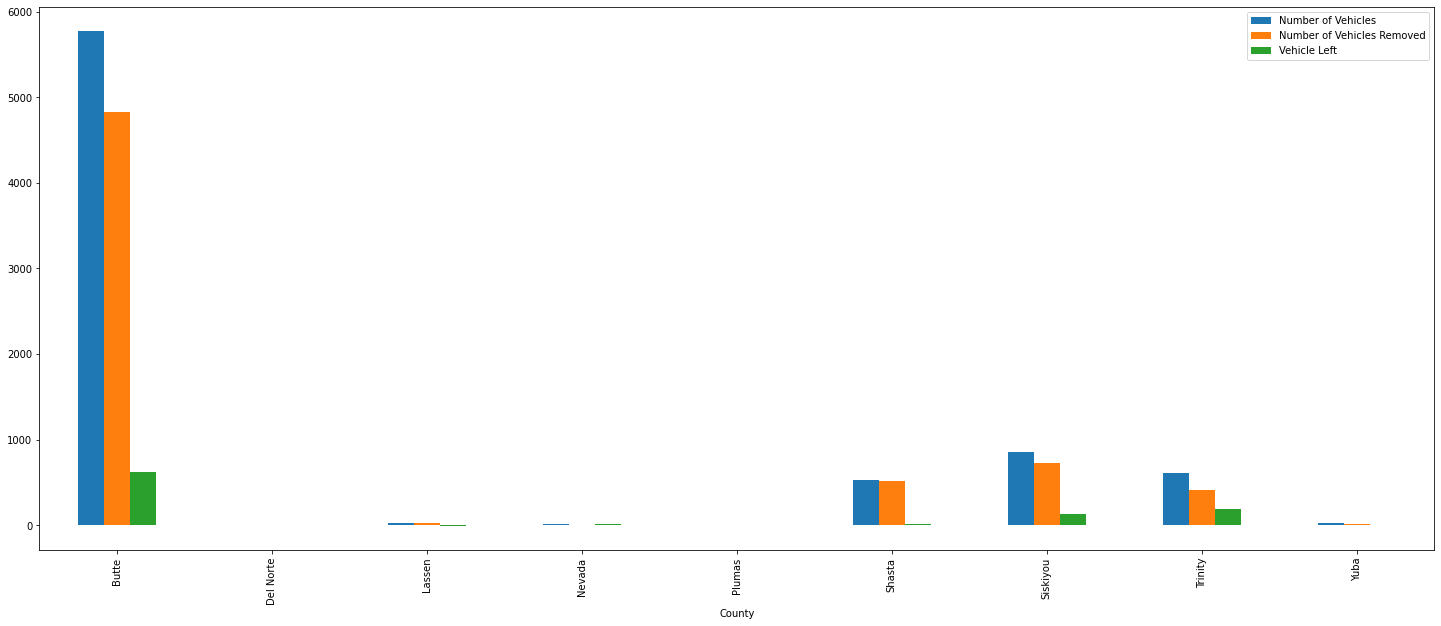

In [13]:
dfVecfilt.plot(kind='bar', figsize=(25,10))

# Make graph above with total for each bar placed on top

In [19]:
df_index = df.groupby(['APN']).sum()
df_value = df_index.loc[:, ['Number of Vehicles','Number of Vehicles Removed','Vehicle Left']]

In [20]:
df_index

,Haz Tree Only,# of Trees,Hold,Gate Locked?,Not Eligible,Safety Concern Property,Phase 1 Complete,Needs Milk Run or Phase 1 Revisit,Milk Run/Phase 1 Revisit Complete,EHP Attention Required,...,Latitude,Longitude,Lake Madrone Property,County Notified of Ineligibility,Approved for Special Inclusion,Number of Hazard Trees Felled,Trees Final Site Walk,duplicate,Sync Status,Vehicle Left
APN,,,,,,,,,,,,,,,,,,,,,
003-170-009-000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,39.731303,-121.119165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003-170-022-000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,39.727683,-121.119804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003-170-023-000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,39.727693,-121.117481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003-170-024-000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,39.727691,-121.115462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
004-081-059-000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,39.266347,-121.099983,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121-140-013-000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,41.976159,-123.726433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
121-140-016-000,1.0,340.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,41.977200,-123.732100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121-140-017-000,0.0,323.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,41.975071,-123.730324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_index = df.groupby(['County']).sum()

df_value2 = df_index.loc[:, 'Number of Vehicles']
df_value3 = df_index.loc[:, 'Number of Vehicles Removed']
df_value4 = df_index.loc[:, 'Vehicle Left']

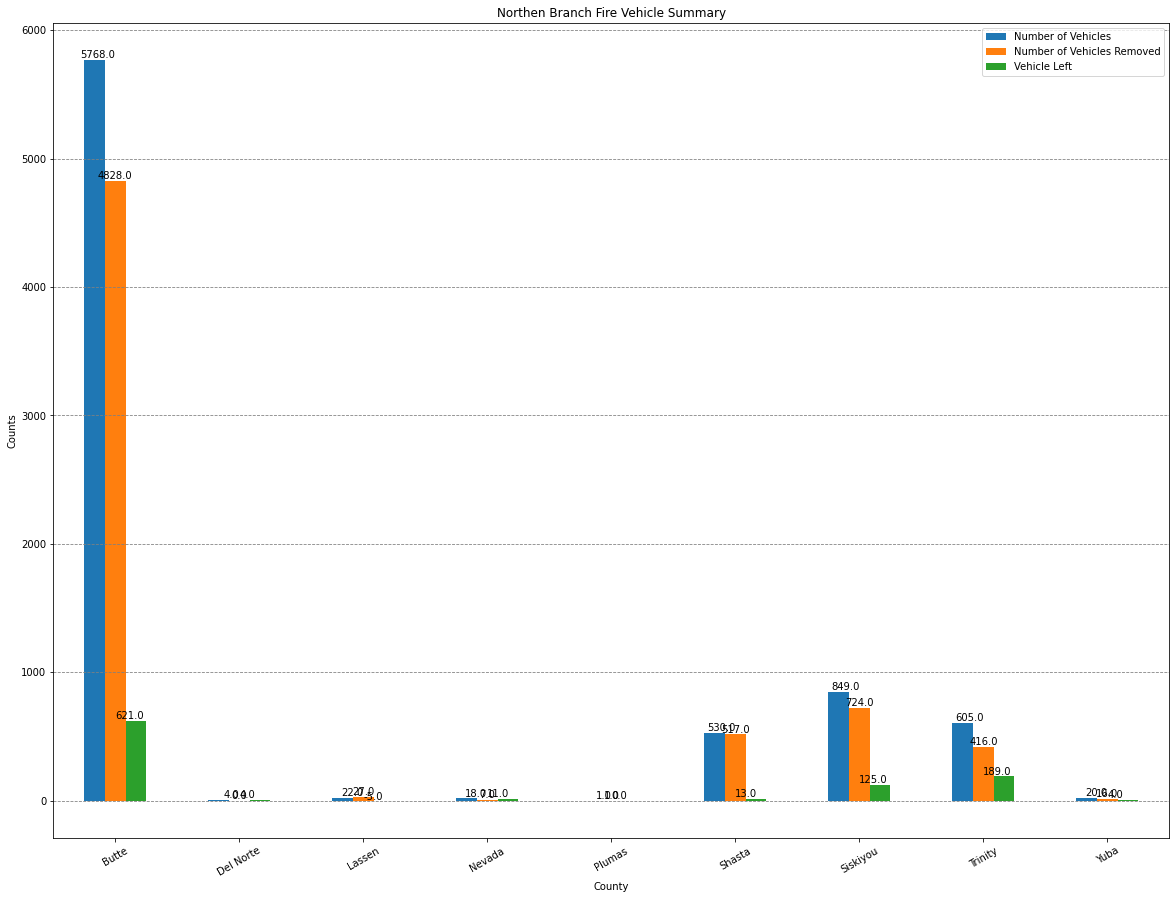

In [17]:
df_value.plot(kind='bar',  figsize=(20,5))

for i in range(len(df_index)):
    plt.text(i, df_value2[i], df_value2[i], ha='right', va='bottom')
    plt.text(i, df_value3[i], df_value3[i], ha='center', va='bottom')
    plt.text(i, df_value4[i], df_value4[i], ha='left', va='bottom')
plt.xticks(rotation=30)
plt.title("Northen Branch Fire Vehicle Summary")
plt.ylabel("Counts")
plt.grid(color='gray', linestyle='--', axis='y')
# plt.tight_layout()
plt.show()